# Fetch Rewards Coding Exercise - Data Analytics Internship

## Thomas Lesniak
## tjlesniak@wisc.edu


Based on my analysis of the data, I have observed that there are indications of fraudulent activities where users are submitting fake receipts to the system. For instance, I have identified instances where a single user spent an unusually large amount of money in a short period of time. In August, one user spent a total of 157,719.27, and upon further investigation, it was discovered that the most expensive item purchased was a Starbucks Iced Coffee Premium Coffee Beverage which totaled 31,005.99.

To safeguard our company's interests and discourage such dishonest behavior, I recommend shifting our focus towards identifying and preventing fraudulent rewards. This could involve implementing monitoring mechanisms for high-value purchases. By proactively taking measures to prevent such fraudulent activities, we can ensure that our loyalty program remains fair and trustworthy for all users.

Furthermore, the analysis reveals that the number of users scanning each month is relatively consistent with a slight increase during the holiday season in December and January. Additionally, I have provided a table below of the top 10 brands that users spent the most money on in June.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
#Using pandas to load each csv file into its own data frame
receipts_df = pd.read_csv("receipts.csv")
receipt_items_df = pd.read_csv("receipt_items.csv")
brands_df = pd.read_csv("brands.csv")
users_df = pd.read_csv("users.csv")

In [3]:
#I will be using sqlite3
conn = sqlite3.connect('database.db')

#From here I will convert the data frame to a sqlite table
receipts_df.to_sql('receipts', conn, if_exists='replace', index=False)
receipt_items_df.to_sql('receipt_items', conn, if_exists='replace', index=False)
brands_df.to_sql('brands', conn, if_exists='replace', index=False)
users_df.to_sql('users', conn, if_exists='replace', index=False)

164

## Which brand saw the most dollars spent in the month of June?

### ANNIES HOMEGROWN had the most dollars spent in June with a total of 502.23

In [13]:
# Execute a SQL query
query = """
SELECT b.BRAND_CODE, SUM(ri.TOTAL_FINAL_PRICE) as total_spent
FROM receipt_items ri
JOIN receipts r ON r.ID = ri.REWARDS_RECEIPT_ID
JOIN brands b ON ri.BRAND_CODE = b.BRAND_CODE
WHERE strftime('%m', r.DATE_SCANNED) = '06'
GROUP BY b.BRAND_CODE
ORDER BY total_spent DESC
LIMIT 10;
"""
result_df = pd.read_sql_query(query, conn)

# Print the result
result_df

,BRAND_CODE,total_spent
0,ANNIES HOMEGROWN,502.23
1,PEPSI,479.13
2,COSTCO,459.61
3,KRAFT,379.98
4,GATORADE,378.59
5,COORS LIGHT,338.50
6,MILLER LITE,271.90
7,ATKINS,266.38
8,OSCAR MAYER,256.14
9,JIMMY DEAN,242.42


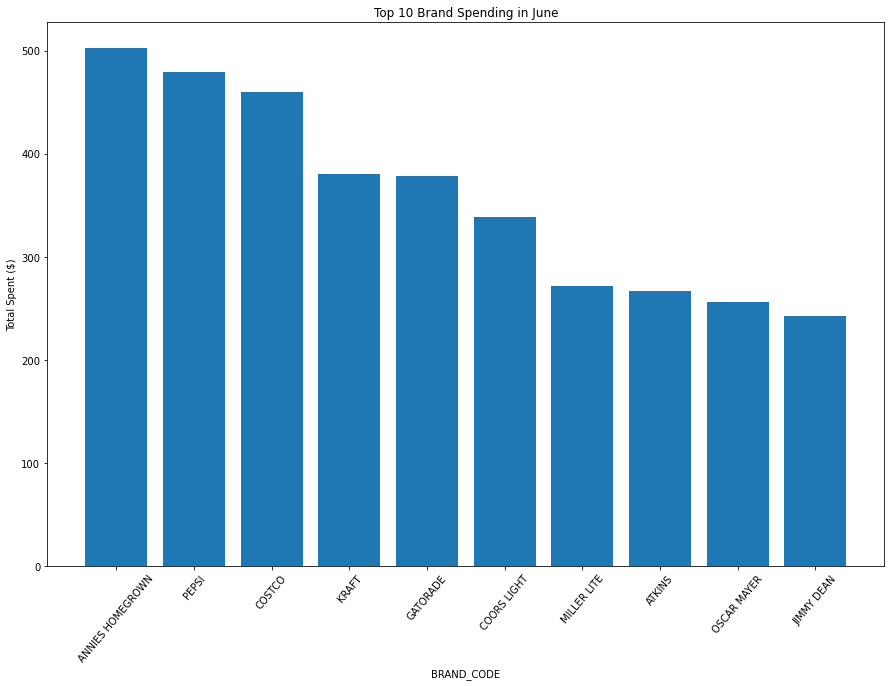

In [18]:
plt.figure(figsize=(15, 10)) # adjust the figure size
plt.bar(result_df['BRAND_CODE'], result_df['total_spent'])
plt.xlabel("BRAND_CODE")
plt.ylabel('Total Spent ($)')
plt.title('Top 10 Brand Spending in June')
plt.xticks(range(len(result_df['BRAND_CODE'])), result_df['BRAND_CODE'], rotation=50)
plt.show()

## Which user spent the most money in the month of August?

### user 609ab37f7a2e8f2f95ae968f  spent the most in August with a total of 157719.27

In [6]:
query = """
SELECT u.ID, SUM(ri.TOTAL_FINAL_PRICE) as total_spent
FROM receipts r 
JOIN users u ON r.USER_ID = u.ID
JOIN receipt_items ri ON r.ID = ri.REWARDS_RECEIPT_ID
WHERE strftime('%m', r.DATE_SCANNED) = '08'
GROUP BY u.ID
ORDER BY total_spent DESC
LIMIT 10;
"""
result_df = pd.read_sql_query(query, conn)

# Print the result
result_df

,ID,total_spent
0,609ab37f7a2e8f2f95ae968f,157719.27
1,5ffb49a847903912705e9a64,19512.85
2,607cfe881c7f7e6d7249b73a,11851.77
3,6032cb807d464912dab4dc1e,11261.56
4,610d67eb90b1714ee8a66944,8186.42
5,61757c3da9619d4881912d84,8084.37
6,6115880fa009af1799ef9104,7067.87
7,601769bf3dedd212c85f049b,7049.90
8,60b7b2011d501f6c02387b62,6515.58
9,607475dbdc5e904b8a919b52,6427.83


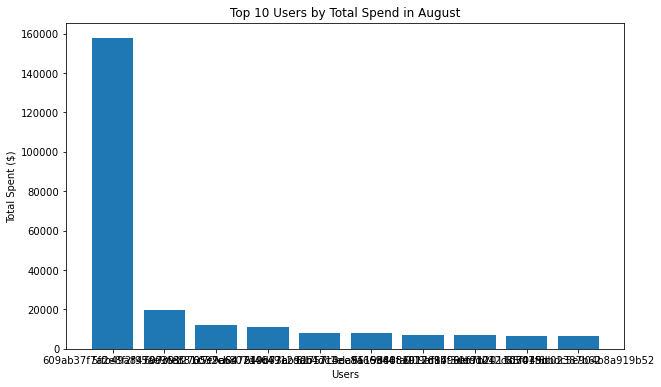

In [7]:
plt.figure(figsize=(10, 6)) # adjust the figure size
plt.bar(result_df['ID'], result_df['total_spent'])
plt.xlabel("Users")
plt.ylabel('Total Spent ($)')
plt.title('Top 10 Users by Total Spend in August')
plt.show()

# What user bought the most expensive item?

### User 617376b8a9619d488190e0b6 bought the most expensive item  31005.99

In [8]:
#What user bought the most expensive item?
query = """
SELECT r.USER_ID, MAX(ri.TOTAL_FINAL_PRICE) AS max_price
FROM receipts r
JOIN receipt_items ri ON r.ID = ri.REWARDS_RECEIPT_ID
GROUP BY r.USER_ID
ORDER BY max_price DESC
LIMIT 10;
"""

result_df = pd.read_sql_query(query, conn)

# Print the result
result_df

,USER_ID,max_price
0,617376b8a9619d488190e0b6,31005.99
1,609ab37f7a2e8f2f95ae968f,31000.00
2,6032cb807d464912dab4dc1e,8700.00
3,61a1a19706570b5913a27b8c,8005.05
4,609756de547223427a2c627e,5079.28
5,61375682c625197c5db73602,4745.66
6,5ffb49a847903912705e9a64,4713.65
7,6006637e964bbe129c1fbe69,4267.55
8,61671d28d7bd1d50be050568,3747.80
9,61562d8cb220b85b9614d43e,3604.03


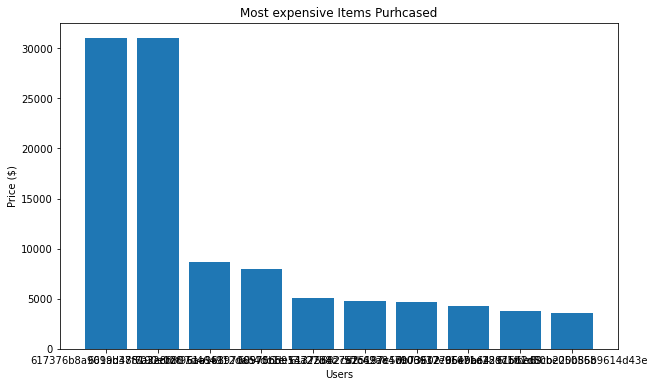

In [9]:
plt.figure(figsize=(10, 6)) # adjust the figure size
plt.bar(result_df['USER_ID'], result_df['max_price'])
plt.xlabel("Users")
plt.ylabel("Price ($)")
plt.title('Most expensive Items Purhcased')
plt.show()

# What is the name of the most expensive item purchased?

### The most expensive item was Starbucks Iced Coffee Premium Coffee Beverage   31005.99

In [10]:
#What user bought the most expensive item?
query = """
SELECT ri.DESCRIPTION, MAX(ri.TOTAL_FINAL_PRICE) AS max_price
FROM receipt_items ri
JOIN brands b ON ri.BRAND_CODE = b.BRAND_CODE
GROUP BY ri.DESCRIPTION
ORDER BY max_price DESC
LIMIT 10;
"""

result_df = pd.read_sql_query(query, conn)

# Print the result
result_df

,DESCRIPTION,max_price
0,Starbucks Iced Coffee Premium Coffee Beverage ...,31005.99
1,Imperial Cashew Snack Mix,1400.00
2,JIMMY DEAN DELIGHTS FROZEN TURKEY SAUSAGE EGG ...,515.38
3,Totino's Cheesy Chicken Stuffed Nachos,510.00
4,ANN N VIO AAVTNAA,493.90
5,Scott 1000 Toilet Tissue 1 Ply 1000 Count 1 Co...,467.82
6,SARA LEE,400.00
7,Scott 1000 1 Ply 1000 Cotton Toilet Tissue Uns...,359.85
8,pizza,334.23
9,Better Homes & Gardens Modern Farmhouse TV Sta...,309.00


# How many users scanned in each month?

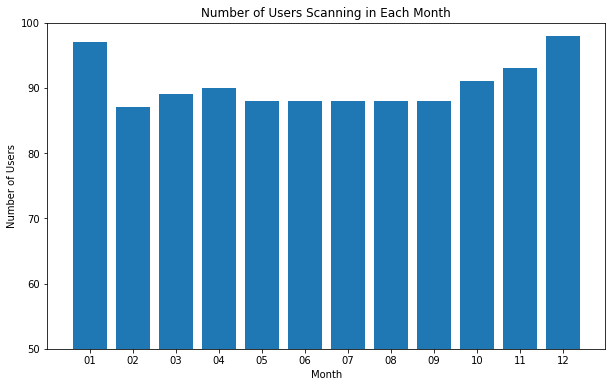

,month,num_users
0,01,97
1,02,87
2,03,89
3,04,90
4,05,88
5,06,88
6,07,88
7,08,88
8,09,88
9,10,91


In [11]:
#What user bought the most expensive item?
query = """
SELECT strftime('%m', r.DATE_SCANNED) AS month, COUNT(DISTINCT r.USER_ID) AS num_users
FROM receipts r
GROUP BY month;
"""

result_df = pd.read_sql_query(query, conn)

# Print the result


# create a bar chart of the total_spent column
plt.figure(figsize=(10, 6)) # adjust the figure size
plt.bar(result_df['month'], result_df['num_users'])
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('Number of Users Scanning in Each Month')
plt.ylim([50, 100])
plt.show()
result_df

In [19]:
# Close the database connection
conn.close()